Dataset shape before cleaning: (2075259, 9)
Dataset shape after cleaning: (2049280, 8)
Training samples: 163942
Testing samples: 40986


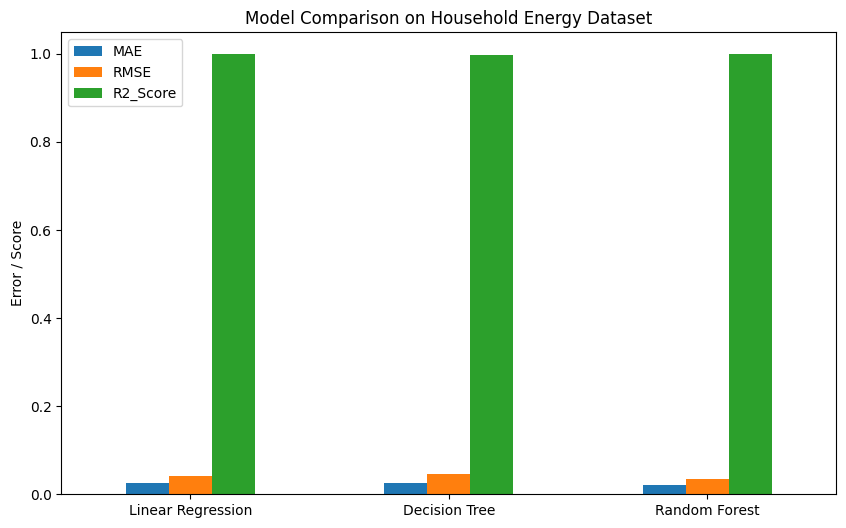

In [ ]:
# ============================
#  Energy Prediction Project
# Week 1 + Week 2 Tasks
# ============================

#  Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================
#  Step 1: Load Dataset (Week 1 - Data Collection & Understanding)
# Dataset link: UCI Household Electric Power Consumption
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"

# Load with separator ; and handle missing values marked as '?'
df = pd.read_csv(url, sep=';', low_memory=False, na_values='?', compression='zip')

print("Dataset shape before cleaning:", df.shape)
df.head()

# ============================
#  Step 2: Data Preprocessing (Week 1)
# ============================

# Convert 'Date' and 'Time' into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

# Drop rows with missing DateTime
df = df.dropna(subset=['DateTime'])

# Select useful numeric features
df = df[['DateTime', 'Global_active_power', 'Global_reactive_power',
             'Voltage', 'Global_intensity', 'Sub_metering_1',
             'Sub_metering_2', 'Sub_metering_3']]

# Drop rows with missing values
df = df.dropna()

print("Dataset shape after cleaning:", df.shape)
df.head()

# ============================
#  Step 3: Define Problem (Week 1)
# ============================

# Goal: Predict household energy consumption (Global_active_power)
# Features: Voltage, Intensity, Sub_meterings, etc.
# Target: Global_active_power (kW)

# ============================
# Sample Data (Addressing large dataset size)
# ============================
# Sample 10% of the data to speed up model training for demonstration purposes
df_sampled = df.sample(frac=0.1, random_state=42)

X = df_sampled[['Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df_sampled['Global_active_power']


# ============================
#  Step 4: Data Splitting (Week 1)
# ============================

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


# ============================
#  Step 5: Implement Models (Week 2)
# ============================

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, rmse, r2]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2_Score"])
results_df

# ============================
#  Step 6: Visualize Results (Week 2)
# ============================

results_df.T.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison on Household Energy Dataset")
plt.ylabel("Error / Score")
plt.xticks(rotation=0)
plt.show()
